Bonus for SQL-challenge in Bootcamp class

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
# Define the engine string to be used for connecting to EmployeeSQL
engine = create_engine('postgresql://postgres:B00tC@mp@localhost:5432/EmployeeSQL')
# connection = engine.connect()

In [3]:
# Read each table from EmployeeSQL database into a dataframe
departments_df = pd.read_sql_query('select * from departments',con=engine)
employees_df   = pd.read_sql_query('select * from employees',con=engine)
titles_df      = pd.read_sql_query('select * from titles',con=engine)
salaries_df    = pd.read_sql_query('select * from salaries',con=engine)
dept_emp_df    = pd.read_sql_query('select * from dept_emp',con=engine)
dept_manager_df= pd.read_sql_query('select * from dept_manager',con=engine)

In [49]:
salaries_df    = pd.read_sql_query('select * from salaries',con=engine)

In [50]:
# Replace the , and $ and .00 from 'salary' column (defined as 'money' in Postgres), convert to integer
salaries_df['salary'] = salaries_df['salary'].replace({'\$': '', ',': '', '\.00': ''}, regex=True).astype("int64")
salaries_df.dtypes

emp_no    int64
salary    int64
dtype: object

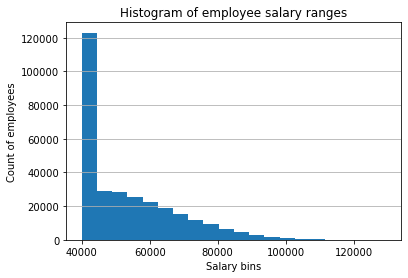

In [53]:
# Plot histogram of salary ranges
plt.hist(salaries_df["salary"], bins=20)
plt.title("Histogram of Employee Salary Ranges")
plt.xlabel("Salary bins")
plt.ylabel("Count of employees")
plt.grid(axis="y")
plt.show()

In [60]:
# join 3 dataframes to get relationship between salary and title, group by title and get average salary
salary_title_df = salaries_df.merge(employees_df, on="emp_no").merge(titles_df, left_on="emp_title_id", right_on="title_id")
avg_salary_df = salary_title_df[["title", "salary"]].groupby(by="title").mean()
avg_salary_df

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


In [74]:
# Undo the indexing of title so we can use it as an x column in plotting
avg_salary_df = avg_salary_df.reset_index()

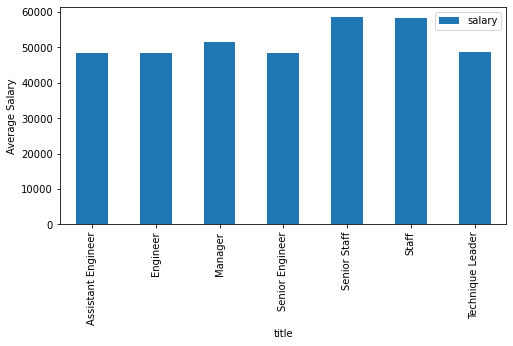

In [77]:
# Create a bar chart of average salary by title
avg_salary_df.plot.bar(x="title", y="salary", figsize=(8,4))
plt.ylabel("Average Salary")
plt.show()

ValueError: cannot insert level_0, already exists